# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA   
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Importar para guardar y cargar el modelo
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [26]:
df = pd.read_csv('data/comprar_alquilar.csv')
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [28]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


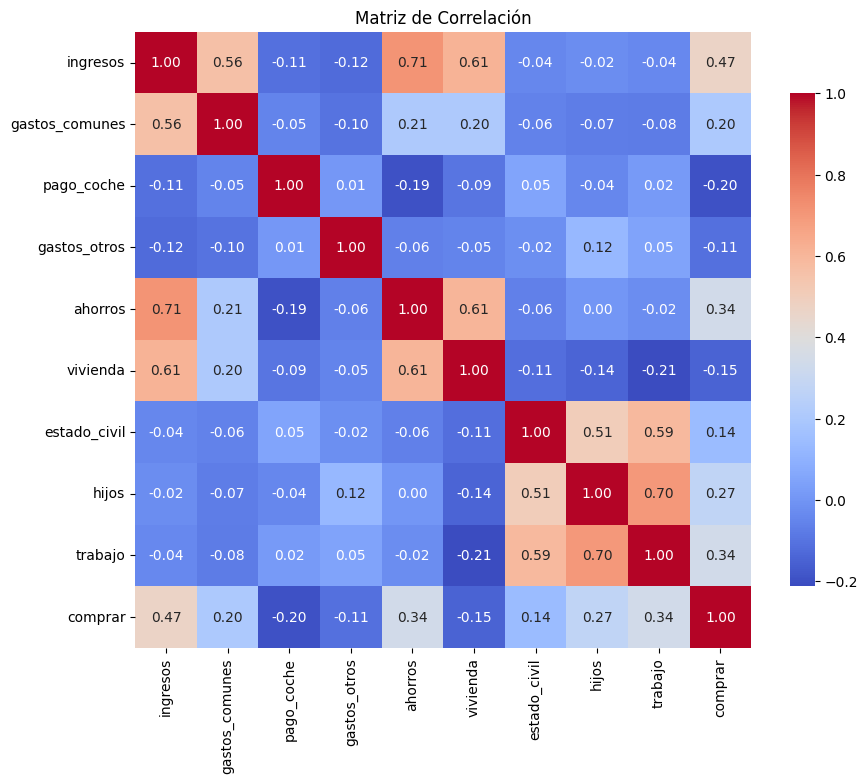

In [29]:
# matriz de correlación
corr = df.corr()
# visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}) 
plt.title('Matriz de Correlación')
plt.show()

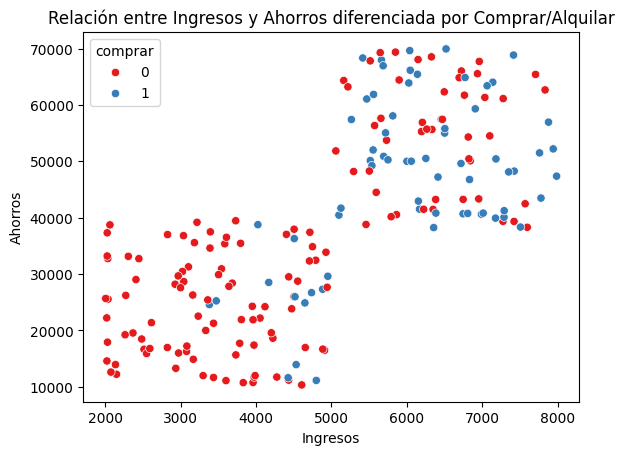

In [ ]:

# Crear el scatterplot para visualizar la relación entre 'ingresos' y 'ahorros'
sns.scatterplot(data=df, x='ingresos', y='ahorros', hue='comprar', palette='Set1')

# Títulos y etiquetas
plt.title("Relación entre Ingresos y Ahorros diferenciada por Comprar/Alquilar")
plt.xlabel("Ingresos")
plt.ylabel("Ahorros")

# Mostrar el gráfico
plt.show()

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

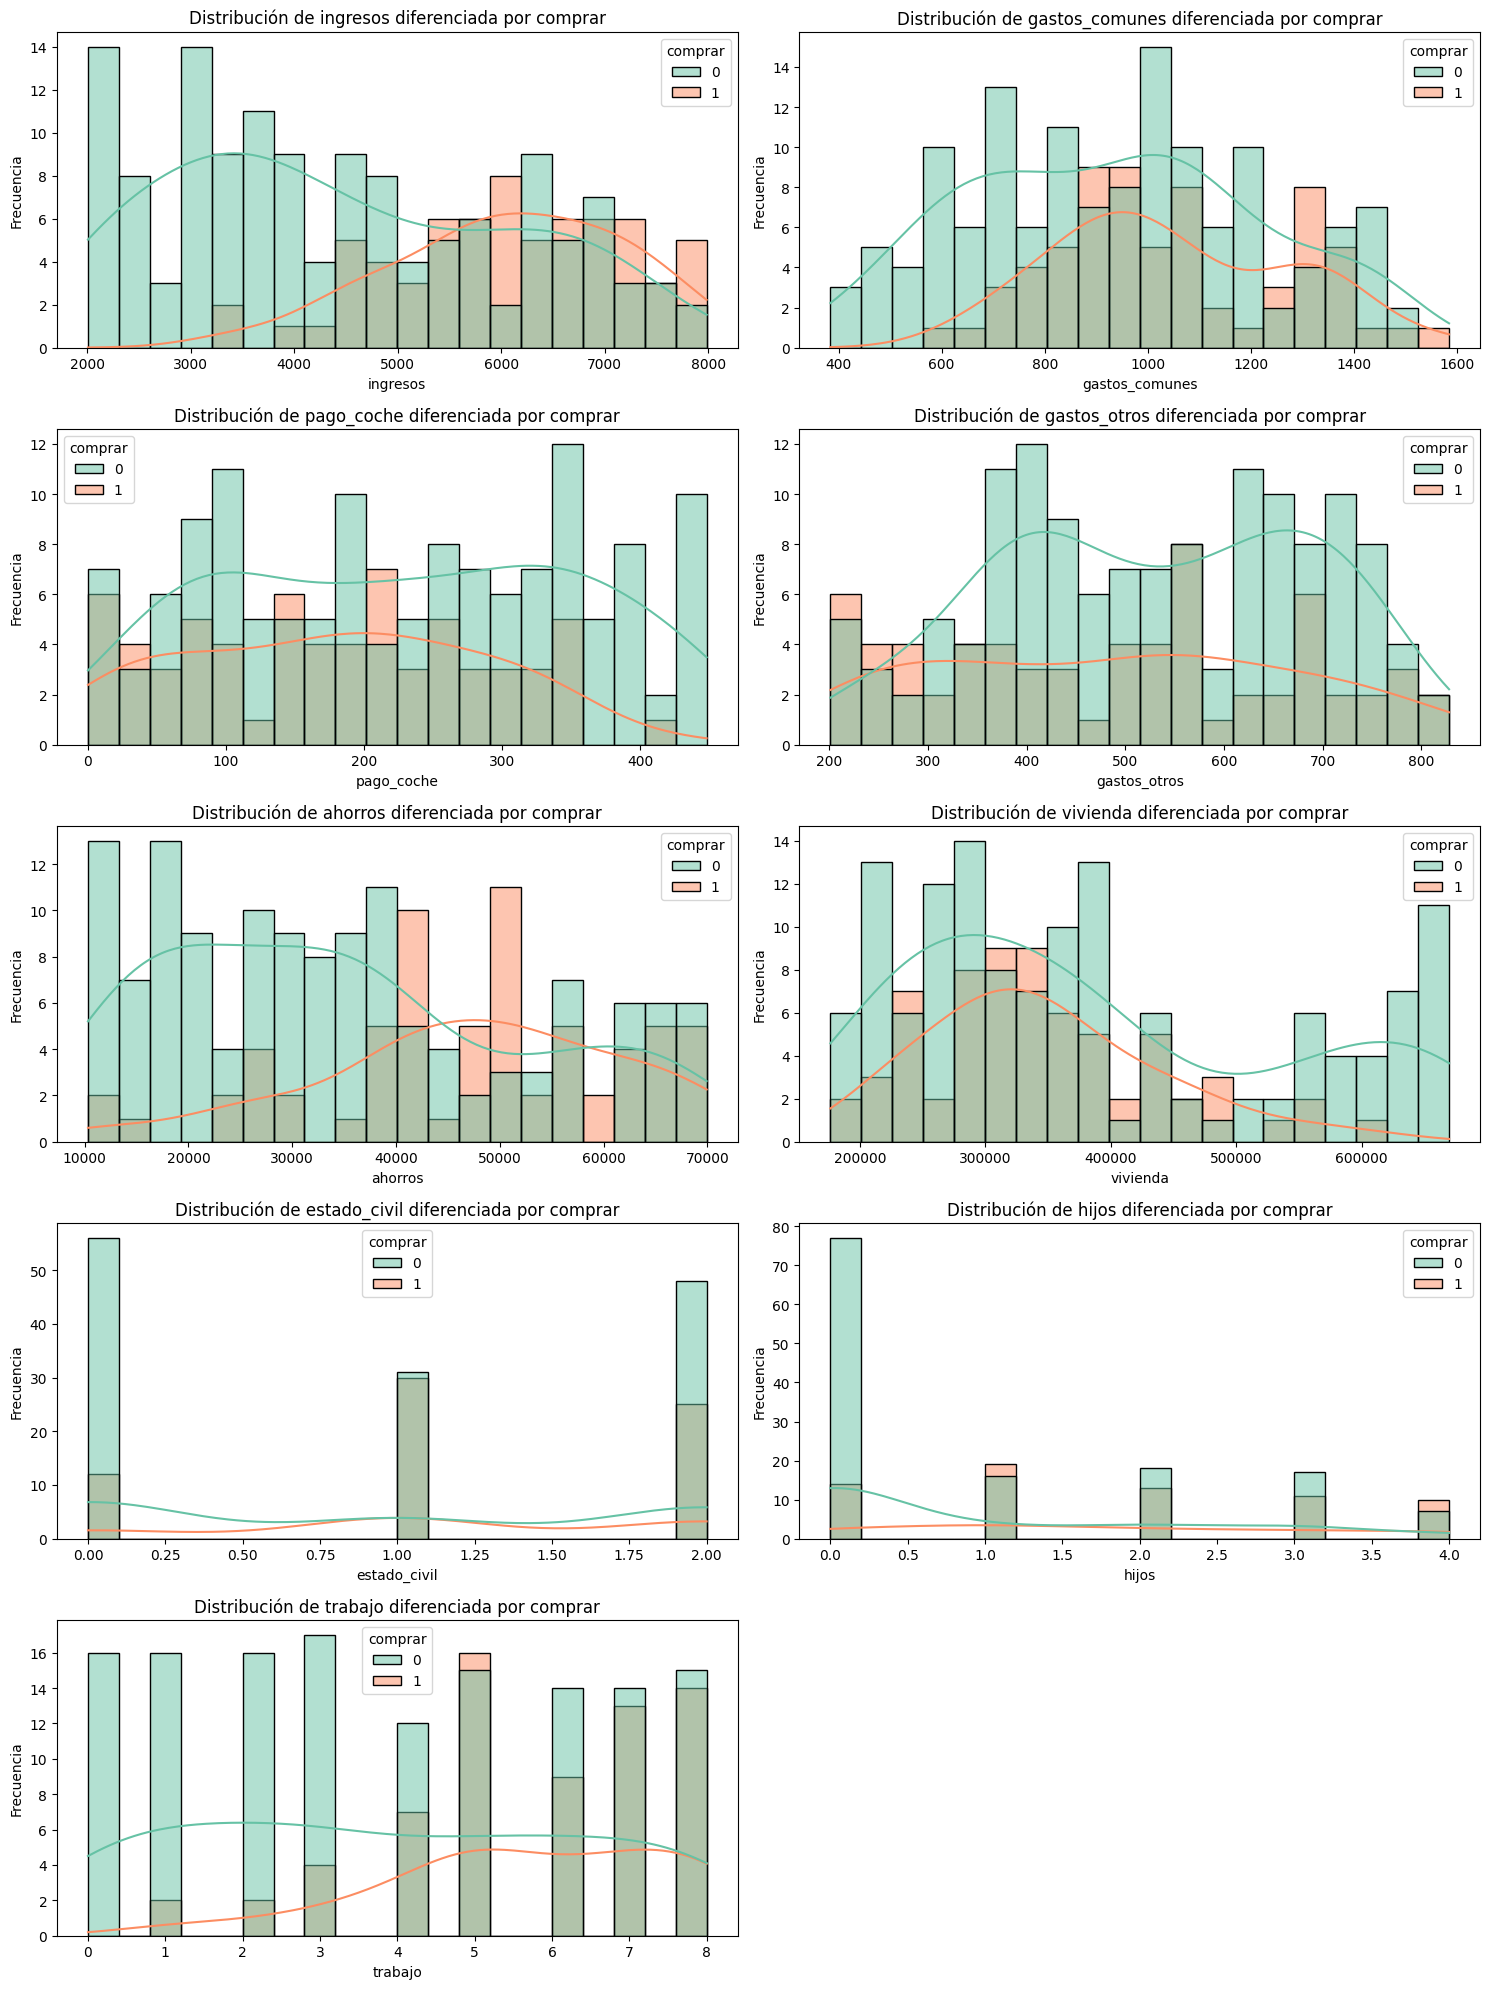

In [30]:
# Visualización univariante con histogramas
variables = df.columns[:-1]  # Excluimos la columna 'comprar'
target = 'comprar'

plt.figure(figsize=(15, 20))
for i, var in enumerate(variables, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=var, hue=target, kde=True, palette='Set2', bins=20)
    plt.title(f'Distribución de {var} diferenciada por {target}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

- Conclusiones y patrones observados:
- Las personas que compran tienden a tener más ingresos, más ahorros, y mayores gastos en vivienda en comparación con las personas que alquilan.
- Los gastos comunes no muestran una diferencia clara entre los dos grupos, pero las personas que alquilan parecen tener una distribución más concentrada de los pagos de coche.
- Los individuos que compran suelen tener más hijos y están casados con más frecuencia.
- En general, las personas que alquilan tienen distribuciones de ingresos, gastos y ahorros más dispersas.

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [31]:
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(df[variables])
scaled_df = pd.DataFrame(scaled_data, columns=variables)
scaled_df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,0.620129,0.104689,-1.698954,0.504359,0.649475,0.195910,-1.227088,0.562374,-0.984420
1,1.063927,-0.101625,-0.712042,-0.515401,0.259224,1.937370,-0.029640,1.295273,0.596915
2,0.891173,0.226266,-0.912634,1.667244,1.080309,-0.379102,1.167809,-0.170526,1.387582
3,1.274209,1.128886,-1.578599,-1.559015,0.909604,2.114062,-1.227088,-0.903426,-0.589086
4,0.719611,-0.400042,0.090326,0.027279,0.159468,-0.179497,-1.227088,-0.903426,-0.589086
...,...,...,...,...,...,...,...,...,...
197,-0.671949,-1.037402,1.125381,-0.163554,-1.617963,-0.075199,-1.227088,-0.903426,-0.984420
198,-0.594508,0.215214,0.467439,-0.241079,-0.973876,-0.683130,1.167809,1.295273,1.387582
199,-1.057368,-0.061099,0.515581,1.005294,-0.183849,0.107880,-0.029640,1.295273,1.387582
200,-0.968013,-0.385305,1.261783,0.814462,-1.083273,0.026040,-0.029640,0.562374,0.201581


## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [32]:
pca = PCA(n_components=9)
pca_data = pca.fit_transform(scaled_data)

# Convertimos los datos transformados a un DataFrame para facilitar su manejo
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(9)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.321915,-0.222950,1.599863,-0.885014,0.646617,-0.700208,0.318031,-0.751809,0.269984
1,1.147878,1.716967,0.395722,-0.447960,-0.687805,-0.231969,1.542487,0.221799,0.438425
2,0.090369,1.836066,1.359382,0.337505,0.742387,0.593030,-1.540495,0.668120,0.153463
3,3.455898,-0.078279,-0.202382,-1.573584,-0.068551,-0.051945,0.909409,0.684486,-0.129045
4,0.916933,-1.184676,0.190036,0.117804,-0.147753,-0.619750,-0.450419,0.194341,0.687452
...,...,...,...,...,...,...,...,...,...
197,-0.707036,-2.506168,-0.430903,0.583919,-0.620195,-0.205709,0.728973,0.244936,0.640035
198,-2.038917,1.378909,-0.824921,0.039240,0.373044,0.013360,0.401364,0.106836,-0.076905
199,-1.481464,0.975900,0.637578,0.884946,0.128337,-0.655749,0.662248,0.437755,-0.796369
200,-1.514633,-0.392176,0.005710,1.308566,-0.114526,-0.056951,0.820040,0.055710,-0.143768


### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [33]:
# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance)

# Imprimimos los resultados
print("Varianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f}")

print("\nVarianza explicada acumulada:")
for i, cum_var in enumerate(cumulative_variance, 1):
    print(f"PC{i}: {cum_var:.4f}")

# Varianza explicada por los primeros 5 componentes
variance_5_components = cumulative_variance[4]
print(f"\nVarianza explicada por los primeros 5 componentes: {variance_5_components:.4f}")

Varianza explicada por cada componente principal:
PC1: 0.2991
PC2: 0.2329
PC3: 0.1171
PC4: 0.1069
PC5: 0.0964
PC6: 0.0563
PC7: 0.0415
PC8: 0.0302
PC9: 0.0197

Varianza explicada acumulada:
PC1: 0.2991
PC2: 0.5321
PC3: 0.6492
PC4: 0.7561
PC5: 0.8524
PC6: 0.9087
PC7: 0.9502
PC8: 0.9803
PC9: 1.0000

Varianza explicada por los primeros 5 componentes: 0.8524


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

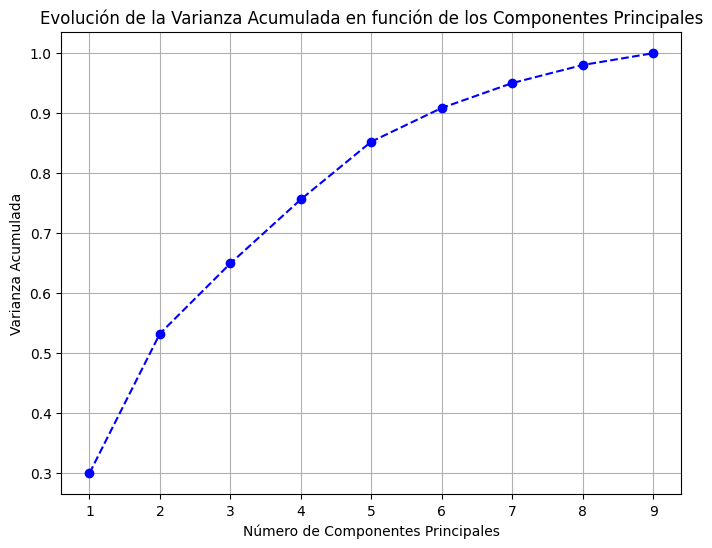

In [34]:
# Gráfico de la variación explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Evolución de la Varianza Acumulada en función de los Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

- El gráfico muestra la varianza acumulada explicada por las componentes principales (PC).
- Lo más importante:Las primeras 4-5 componentes explican la mayoría de la varianza (alrededor del 90%).
- Después de PC4-5, la varianza acumulada se estabiliza, indicando que agregar más componentes no aporta mucha información adicional.

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

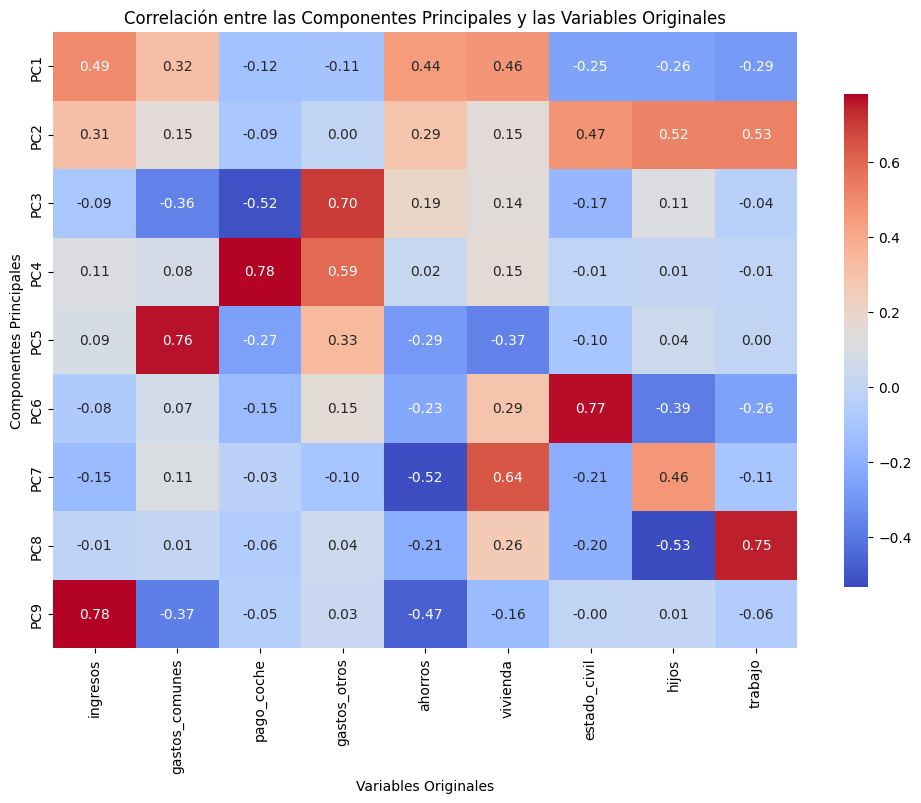

In [35]:
# Obtenemos las componentes principales
components = pca.components_

# Creamos un DataFrame para las correlaciones entre las componentes principales y las variables originales
pca_correlation_df = pd.DataFrame(components, columns=variables, index=[f'PC{i+1}' for i in range(components.shape[0])])

# Visualizamos el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pca_correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": .8})
plt.title('Correlación entre las Componentes Principales y las Variables Originales')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.show()

- PC1 (Componente Principal 1): Alta correlación positiva con ingresos (0.78). Correlación negativa con estado_civil (-0.37). Conclusión: PC1 está fuertemente relacionado con los ingresos y podría representar la capacidad económica de las personas.
- PC2 (Componente Principal 2): Moderada correlación positiva con ingresos (0.31). Moderada correlación positiva con ahorros (0.47). Conclusión: PC2 está parcialmente influenciada por ingresos y ahorros.
- PC3 (Componente Principal 3):Alta correlación positiva con ahorros (0.64).Correlación negativa con hijos (-0.52). Conclusión: PC3 parece reflejar el patrón relacionado con los ahorros y hijos, donde las personas con más ahorros tienden a tener menos hijos.
- PC5 (Componente Principal 5):Alta correlación positiva con hijos (0.75).Conclusión: PC5 está fuertemente influenciado por el número de hijos, reflejando la estructura familiar.
- PC6 (Componente Principal 6):Alta correlación positiva con vivenda (0.77).Conclusión: PC6 parece estar relacionado con la vivienda, lo que podría reflejar patrones asociados con el tipo de vivienda o el gasto en vivienda.
- PC9 (Componente Principal 9):Alta correlación positiva con ingresos (0.78).Conclusión: PC9 también está muy influenciado por ingresos, sugiriendo que podría representar un componente relacionado con el poder adquisitivo.

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [36]:
# 1 Dividir en train y test
from sklearn.model_selection import train_test_split

X = df[variables]  # Variables independientes
y = df[target]  # Variable objetivo (comprar)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Parte 2. Pipeline con StandardScaler y PCA con 5 componentes y un clasificador

# Definimos el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('pca', PCA(n_components=5)),  # PCA con 5 componentes principales
    ('classifier', RandomForestClassifier(random_state=42))  # Clasificador Random Forest
])

In [38]:
# Entrenamos el pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [39]:
# 4. Predice con test

y_pred = pipeline.predict(X_test)

In [40]:
# 5. Calcula el accuracy score en train y test

# Accuracy en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
print(f"Accuracy en Train: {train_accuracy:.4f}")

# Accuracy en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en Test: {test_accuracy:.4f}")

Accuracy en Train: 1.0000
Accuracy en Test: 0.7805


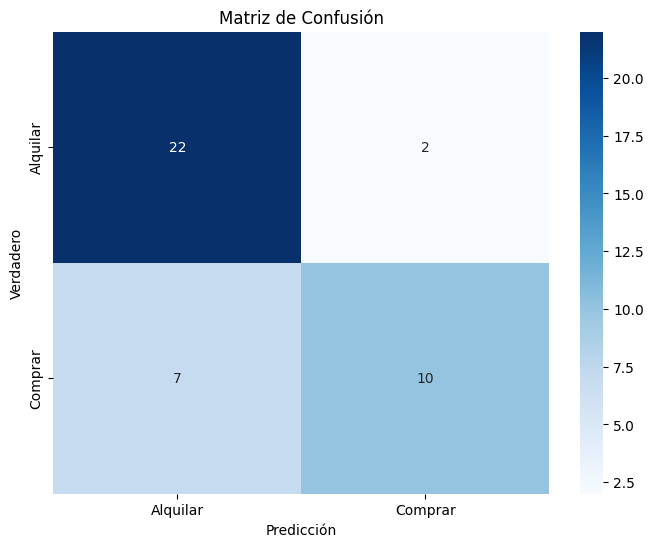

In [41]:
# 6. Representa la matriz de confusión

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alquilar', 'Comprar'], yticklabels=['Alquilar', 'Comprar'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

- Verdaderos Positivos (VP): Los valores 22 (alquilar correctamente) y 10 (comprar correctamente) son los verdaderos positivos. El modelo predice correctamente estos casos.
- Falsos Positivos (FP): El valor 7 (predijo alquilar cuando realmente debería haber sido comprar) es un falso positivo.
- Falsos Negativos (FN): El valor 2 (predijo comprar cuando realmente debería haber sido alquilar) es un falso negativo.
- Verdaderos Negativos (VN): No hay ningún valor directamente indicado como negativo, ya que el modelo solo hace predicciones sobre "alquilar" o "comprar".

- Interpretación del rendimiento del modelo:
- El modelo está haciendo un buen trabajo prediciendo alquilar (22 aciertos) y comprar (10 aciertos), pero también tiene algunos errores:
- Falsos Positivos: Está prediciendo alquilar cuando debería predecir comprar en 7 casos.
- Falsos Negativos: Está prediciendo comprar cuando debería predecir alquilar en 2 casos.

In [42]:
# 7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?

# Definir el modelo de XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Ajustamos el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# Predicción sobre el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Calculamos el accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy en Test con XGBoost: {accuracy_xgb:.4f}")

Accuracy en Test con XGBoost: 0.8537


- Lo hemos mejorado, ya que antes nos daba un valor de  **Accuracy en Test: 0.7805**

In [43]:
# 8 Vuelve a iterar de nuevo con un gridsearch


# Definimos el modelo de XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Definimos el espacio de búsqueda para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 4, 5],  # Profundidad de los árboles
    'subsample': [0.7, 0.8, 0.9],  # Proporción de muestras para cada árbol
    'colsample_bytree': [0.8, 0.9, 1.0]  # Proporción de características para cada árbol
}

# Crear el GridSearchCV para optimizar los parámetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor configuración de parámetros encontrada
print("Mejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

# Mejor score en test (basado en validación cruzada)
print(f"Mejor accuracy en Test después de GridSearchCV: {grid_search.best_score_:.2f}")

# Predicción con el mejor modelo encontrado por GridSearchCV
y_pred_best = grid_search.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy en Test con el modelo de GridSearchCV: {accuracy_best:.2f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros encontrados por GridSearchCV:
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Mejor accuracy en Test después de GridSearchCV: 0.92
Accuracy en Test con el modelo de GridSearchCV: 0.83


In [44]:
# 9 guarda el mejor modelo 

best_model = grid_search.best_estimator_  # Guardamos el mejor modelo encontrado por GridSearchCV
with open('mejor_modelo.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("\nModelo final guardado como 'mejor_modelo.pkl'")


Modelo final guardado como 'mejor_modelo.pkl'
